# Análise dos dados

Esse notebook tem como objetivo extrair informações dos arquivos de métricas gerados pelas execuções dos experimentos. Nele serão gerados os gráficos que compõem o relatório desse trabalho e servirão de base para a argumentação quanto a eficiência e qualidade dos resultados propostos.

In [1]:
# Importação de blibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração geral do estilo
sns.set(style="whitegrid")

In [2]:
# Leitura dos dados
twice_chris_df = pd.read_csv('Results\SimulationV1-laboratory.csv')
bnb_df = pd.read_csv('Results\SimulationV1-bnb-laboratory.csv')

# Concatenação dos dataframes
dataframe = pd.concat([twice_chris_df, bnb_df], ignore_index=True)

# Correção no cálculo da qualidade das soluções
dataframe['quality'] = dataframe.apply(
        lambda row: abs((row['solution'] / row['optimal-solution']) - 1)
        if pd.notnull(row['solution']) and pd.notnull(row['optimal-solution']) else None, axis=1
    )

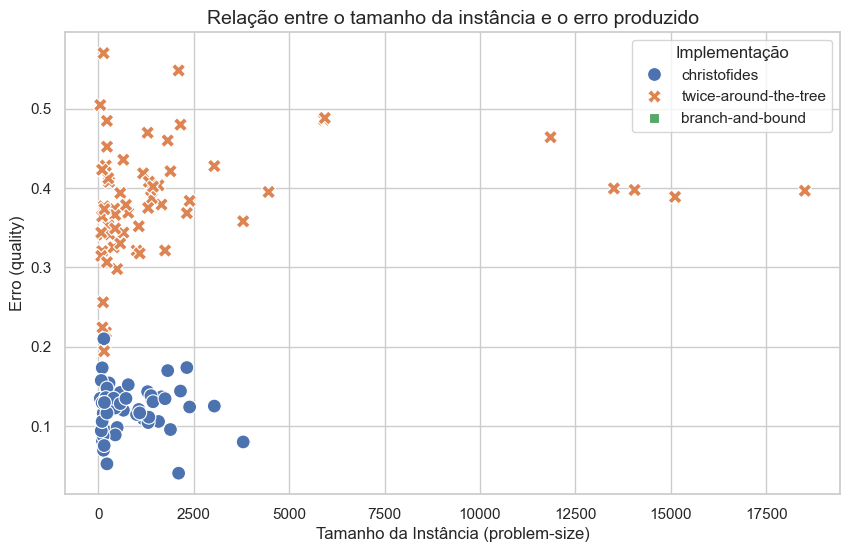

In [3]:
# Gráfico 1: Relação entre tamanho da instância e erro (quality)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x="problem-size", y="quality", hue="algorithm", style="algorithm", s=100)
plt.title("Relação entre o tamanho da instância e o erro produzido", fontsize=14)
plt.xlabel("Tamanho da Instância (problem-size)", fontsize=12)
plt.ylabel("Erro (quality)", fontsize=12)
plt.legend(title="Implementação", loc="upper right")
plt.show()

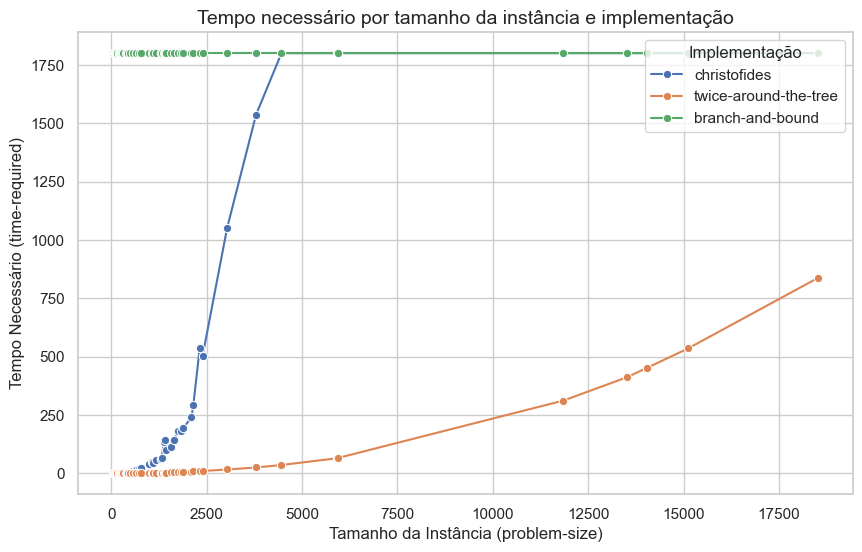

In [4]:
# Gráfico 2: Comparação de desempenho (tempo) por implementação e tamanho da instância
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataframe, x="problem-size", y="time-required", hue="algorithm", marker="o")
plt.title("Tempo necessário por tamanho da instância e implementação", fontsize=14)
plt.xlabel("Tamanho da Instância (problem-size)", fontsize=12)
plt.ylabel("Tempo Necessário (time-required)", fontsize=12)
plt.legend(title="Implementação", loc="upper right")
plt.show()

C:\Users\erikn\AppData\Local\Temp\ipykernel_756\804174695.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=dataframe, x="algorithm", y="space-required", ci="sd", palette="muted")
C:\Users\erikn\AppData\Local\Temp\ipykernel_756\804174695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x="algorithm", y="space-required", ci="sd", palette="muted")


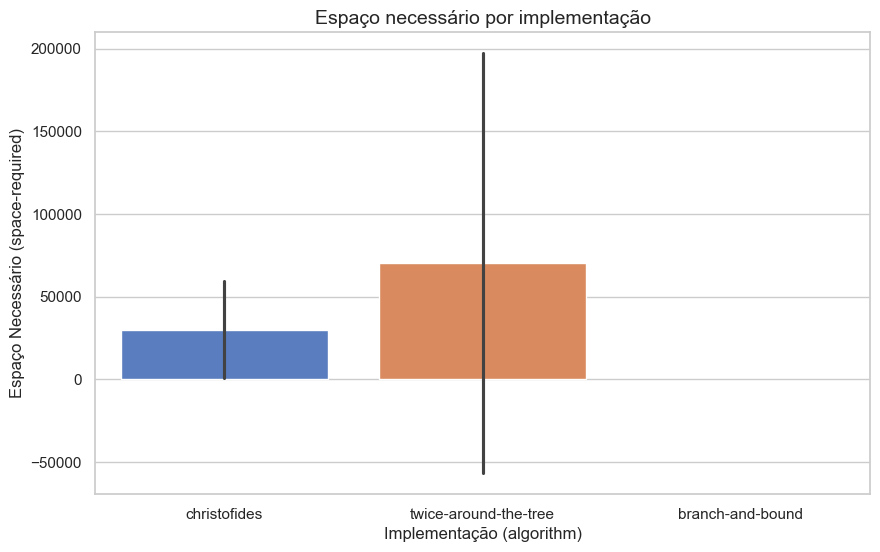

In [5]:
# Gráfico 3: Comparação do espaço necessário por implementação
plt.figure(figsize=(10, 6))
sns.barplot(data=dataframe, x="algorithm", y="space-required", ci="sd", palette="muted")
plt.title("Espaço necessário por implementação", fontsize=14)
plt.xlabel("Implementação (algorithm)", fontsize=12)
plt.ylabel("Espaço Necessário (space-required)", fontsize=12)
plt.show()

# Christofides